In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

random_state = 42
test_size = 0.2

import sys
sys.path.append('../lib')
from models import apply_model, MODELS
from scaler import SCALER, MINMAX, STANDARD, ROBUST, get_scaled
from tools import get_xy_data
from plotting import show_confusion_matrix, show_crossvalidation_box, show_metrics


data_path = '../data/processed/randomForest_selected_features.csv'
rfe_data = '../data/processed/RFE_selected_features.csv'
data = get_xy_data(rfe_data)


df = data['df']
columns = data['columns']
target  = data['target']
columns

x = data['x']
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)


In [5]:
#normalisation

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

scaler = minmax
scaler = standard
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [7]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=150, max_depth=50, class_weight='balanced')
# rf.fit(x_train, y_train)
rf.fit(x_train_scaled, y_train)
# rf_train_predict = rf.predict(x_test)
rf_train_predict = rf.predict(x_test_scaled)
  
accuracy_score(rf_train_predict, y_test), rf.score(x_test, y_test)


/home/yopparay/python_project/tools/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


(0.638904734740445, 0.6417569880205363)

-------------------- random forest --------------------
Scores: [0.63173653 0.64870259 0.61477046 0.66133866 0.65634366 0.63736264
 0.62637363]
Mean: 0.6395183088938435
Standard deviation: 0.015556408896690369


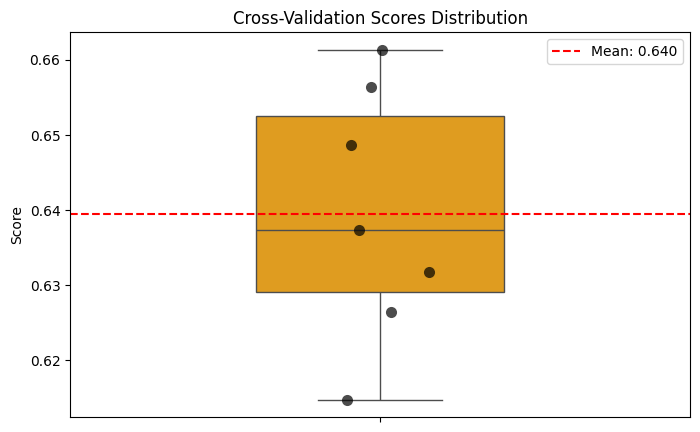

array([0.63173653, 0.64870259, 0.61477046, 0.66133866, 0.65634366,
       0.63736264, 0.62637363])

In [5]:
show_crossvalidation_box(rf, x_train_scaled, y_train)

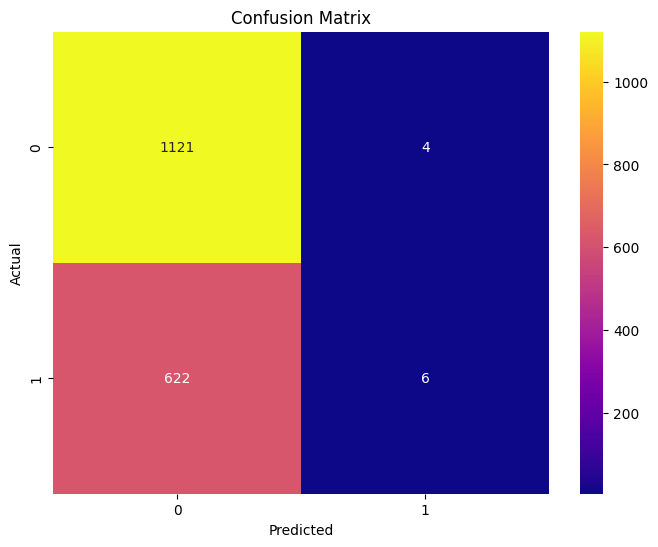

In [172]:
show_confusion_matrix(y_test, rf_train_predict)

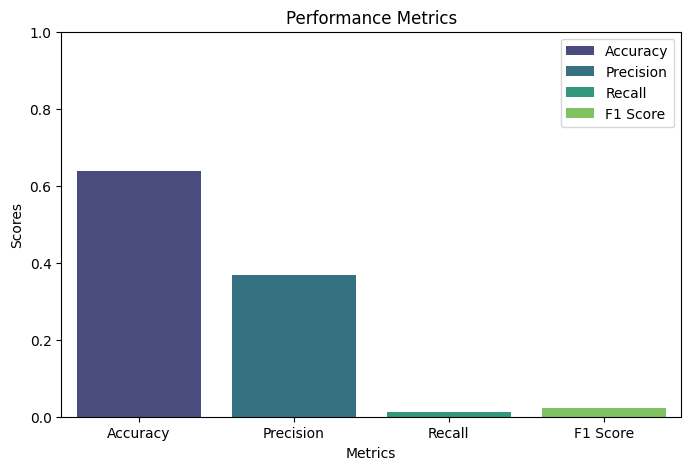

In [9]:
metrics = show_metrics(y_test, rf_train_predict)